In [2]:
import scipy.integrate
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

class ODE_solver():

    def __init__(self,y0,force_eqn,time_eval):
        self.y0 = y0
        self.force_eqn = force_eqn
        self.time_eval = time_eval
        self.solver()

    def solver(self):
        t_init = self.time_eval[0]
        t_fin = self.time_eval[-1]
        sol = scipy.integrate.solve_ivp(self.ODE,(t_init,t_fin),self.y0,t_eval = self.time_eval,rtol = 1e-12)
        self.x = sol.y[0]
        self.v = sol.y[1]

    def ODE(self,t,y):
        x,v = y
        dydt = [v,self.force_eqn(x,v)]
        return  dydt

    def get_positions(self):
        return self.x

    def get_velocities(self):
        return self.v

    def get_times(self):
        return self.time_eval
    
    def get_number_of_times(self):
        return self.time_eval.size
    
    def get_force_eqn(self):
        return self.force_eqn

A better fit for the projectile stopping power curve has been obtained from the preceding work, the electronic stopping power has the fitted form;
$$ S(v) = \frac{3^{1/\alpha}v}{(2 + v^{3\alpha})^{1/\alpha}}$$
The fit is normalised such that the maximum is at $v = 1$ and at the maximum $S = 1$.

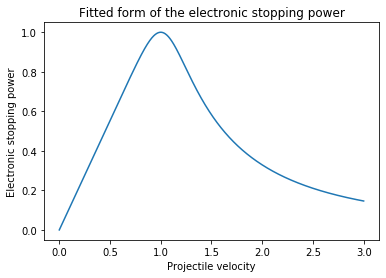

In [3]:
def stopping_power_fit(v,alpha):
    return (3**(1/alpha)*v)/(2 + v**(3*alpha))**(1/alpha)

def stopping_power_fit_plot(v_range,alpha):
    fig,ax = plt.subplots()
    fit = stopping_power_fit(v_range,alpha)
    plt.plot(v_range,fit)
    plt.xlabel('Projectile velocity')
    plt.ylabel('Electronic stopping power')
    plt.title('Fitted form of the electronic stopping power')
    return fig

v_range = np.linspace(0,3,1000)
plot = stopping_power_fit_plot(v_range,4)

Using the fitted form of the electronic stopping power we can better determine the behaviour of the core electrons on the projectile in the different regimes. We start with the equation of motion of the electron in the lab frame:

$$\ddot{x}(t) = -{\omega_{0}}^{2}(x - v_{p}t) - S_{e}(\dot{x})$$
In the lab frame the initial conditions are $x(0) = 0$, $\dot{x}(0) = v_{p}$.

In [4]:
def electron_force_eqn(x,v,t,lin_coeff,projectile_velocity,alpha):
    return -lin_coeff*(x - projectile_velocity*t) -stopping_power_fit(v,alpha)

In [22]:
class ODE_solver_time_dependent(ODE_solver):

    def __init__(self,y0,force_eqn,time_eval):
        ODE_solver.__init__(self,y0,force_eqn,time_eval)

    def ODE(self,t,y):
        x,v = y
        dydt = [v,self.force_eqn(x,v,t)]
        return  dydt


def electron_solution(times,lin_coeff,projectile_velocity,alpha):
    def force(x,v,t):
        return electron_force_eqn(x,v,t,lin_coeff,projectile_velocity,alpha)
    initial = [0,projectile_velocity]
    sol = ODE_solver_time_dependent(initial,force,times)
    return sol

def electron_position_plot(times,lin_coeff,projectile_velocity,alpha):
    fig,ax = plt.subplots()
    sol = electron_solution(times,lin_coeff,projectile_velocity,alpha)
    positions = sol.get_positions()
    relative_positions = positions - projectile_velocity*times
    plt.plot(times,relative_positions)
    plt.xlabel('Time')
    plt.ylabel('Electron displacement from projectile')
    plt.title('Motion of the electron using the fitted form of the stopping power')
    return fig


def electron_velocity_plot(times,lin_coeff,projectile_velocity,alpha):
    fig,ax = plt.subplots()
    sol = electron_solution(times,lin_coeff,projectile_velocity,alpha)
    velocities = sol.get_velocities()
    plt.plot(times,velocities)
    plt.xlabel('Time')
    plt.ylabel('Electron velocity')
    plt.title('Motion of the electron using the fitted form of the stopping power')
    return fig

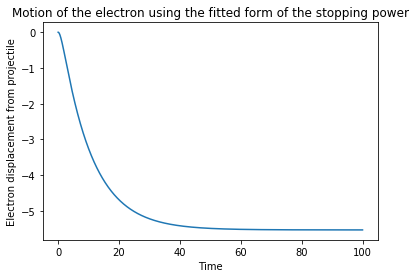

In [5]:
times = np.linspace(0,100,1000)
plot = electron_position_plot(times,0.1,0.5,4)

This solution is for the low projectile velocity regime which corresponds to damped harmonic motion of the electron about the projectile. In this case the restoring force is sufficiently weak that the motion is critically-damped. 

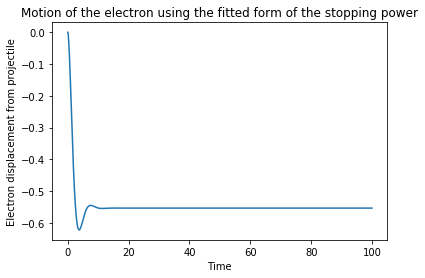

In [6]:
times = np.linspace(0,100,1000)
plot = electron_position_plot(times,1,0.5,4)

Now using a larger restoring force the motion is over-damped as expected. 

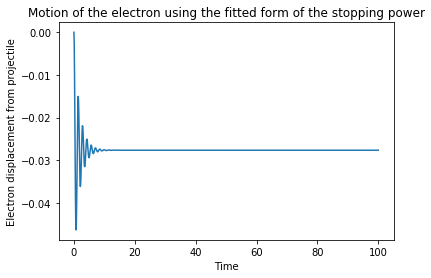

In [7]:
times = np.linspace(0,100,1000)
plot = electron_position_plot(times,20,0.5,4)

For a sufficiently large restoring force the motion is lightly damped. 

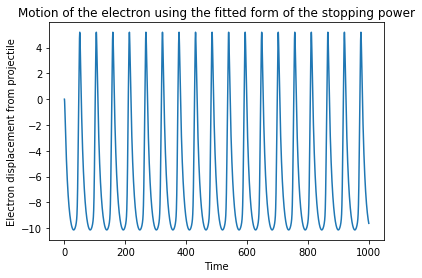

In [8]:
times = np.linspace(0,1000,10000)
plot = electron_position_plot(times,0.1,1,4)

The solution for a projectile with velocity corresponding to the bragg peak remains stable and periodic. The oscillations are at a much lower frequency than for the damped harmonic motion regime when the same parameter for the restoring force is used. 

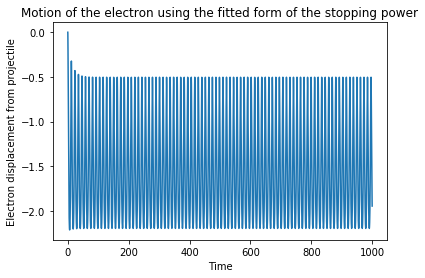

In [9]:
times = np.linspace(0,1000,10000)
plot = electron_position_plot(times,0.5,1,4)

For a projectile velocity corresponding to the bragg peak, increasing the restoring force reduces the amplitude of oscillation and increases the frequency as expected. 

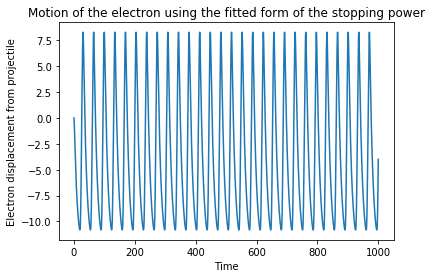

In [10]:
times = np.linspace(0,1000,10000)
plot = electron_position_plot(times,0.1,1.2,4)

Beyond the bragg peak the solution remains stable and periodic, the solution is more symmetric than at the bragg peak, which is expected as the equation of motion is less nonlinear. 

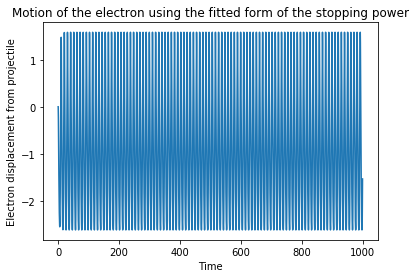

In [11]:
times = np.linspace(0,1000,10000)
plot = electron_position_plot(times,0.5,1.2,4)

Increasing the restoring force when the projectile velocity is beyond the bragg peak reduces the oscillation amplitude and increases the frequency as expected. 

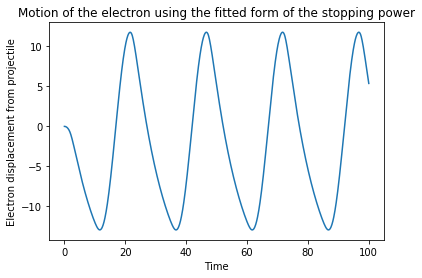

In [12]:
times = np.linspace(0,100,1000)
plot = electron_position_plot(times,0.1,2,4)

Far above the bragg peak the motion remains stable and periodic. 

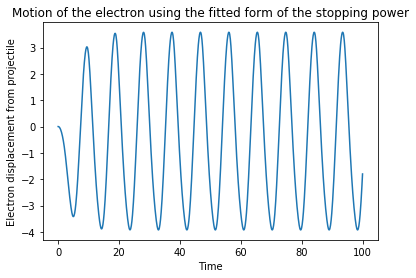

In [13]:
times = np.linspace(0,100,1000)
plot = electron_position_plot(times,0.5,2,4)

For projectile velocities far above the bragg peak, increasing the restoring force reduces the oscillation amplitude and increaes the frequency as expected. 

In [14]:
def electron_energy_plot(times,lin_coeff,projectile_velocity,alpha):
    fig, ax = plt.subplots()
    sol = electron_solution(times,lin_coeff,projectile_velocity,alpha)
    positions = sol.get_positions()
    relative_positions = positions - projectile_velocity*times
    velocities = sol.get_velocities()

    energies = (1/2)*(velocities**2) + (1/2)*lin_coeff*(relative_positions**2)
    plt.plot(times,energies)
    plt.xlabel('Time')
    plt.ylabel('Electron energy')
    plt.title('Electron energy using the fitted form of the stopping power')
    return fig 

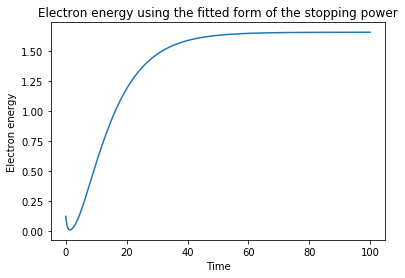

In [15]:
times = np.linspace(0,100,1000)
plot = electron_energy_plot(times,0.1,0.5,4)

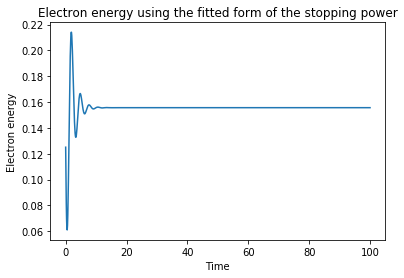

In [16]:
times = np.linspace(0,100,1000)
plot = electron_energy_plot(times,5,0.5,4)

In the damped harmonic regime the energy reaches a constant for large times, corresponding to a finite electron displacement from the projectile due to the constant external force. For sufficiently large restoring forces the energy shows oscillations that decay.

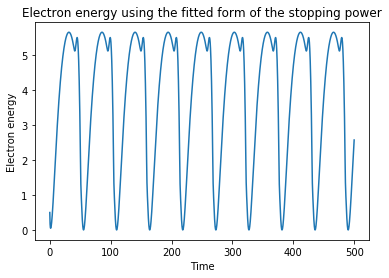

In [17]:
times = np.linspace(0,500,10000)
plot = electron_energy_plot(times,0.1,1,4)

The energy is periodic with a small 'kink' after the maxima in the energy. This 'kink' occurs at the time when the electron is maximally displaced behind the projectile (-x direction) and is caused by the kinetic contribution to the energy being larger than the potential contribution, giving rise to a 2nd peak as the kinetic energy begins to increase as the potential energy decreases (when the electron returns to the equilibrium position).

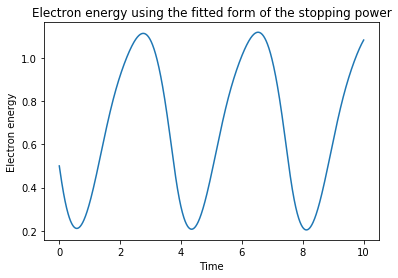

In [18]:
times = np.linspace(0,10,1000)
plot = electron_energy_plot(times,3,1,4)

The 'kink' in the electron energy is removed as the restoring force is increased. 

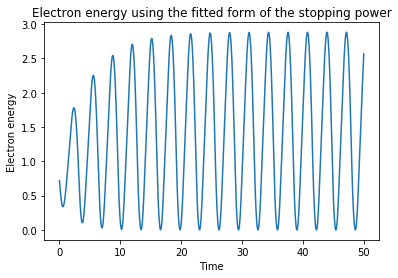

In [19]:
times = np.linspace(0,50,10000)
plot = electron_energy_plot(times,4,1.2,4)

Beyond the bragg peak the energy is periodic. 

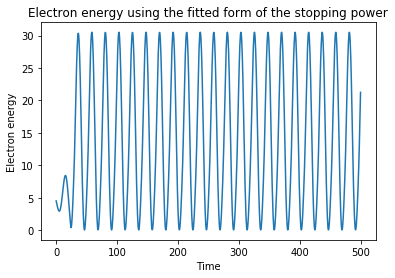

In [20]:
times = np.linspace(0,500,1000)
plot = electron_energy_plot(times,0.1,3,4)

Far beyond the bragg peak the energy is periodic. 

In [21]:
def electron_energy_FT_plot(times,lin_coeff,projectile_velocity,alpha):
    fig, ax = plt.subplots()
    sol = electron_solution(times,lin_coeff,projectile_velocity,alpha)
    positions = sol.get_positions()
    relative_positions = positions - projectile_velocity*times
    velocities = sol.get_velocities()

    energies = (1/2)*(velocities**2) + (1/2)*lin_coeff*(relative_positions**2)
    energy_ave = np.average(energies)
    energy_ft = np.fft.rfft(energies - energy_ave)
    abs_energy_ft = abs(energy_ft)
    abs_energy_ft_norm = abs_energy_ft/np.amax(abs_energy_ft)
    frequencies = 2*np.pi/times[-1]*range(len(abs_energy_ft_norm))
    plt.plot(frequencies,abs_energy_ft_norm)
    plt.xlabel('Frequency')
    plt.ylabel('abs(FT(energy))')
    plt.title('Frequency spectrum of the electron energy')
    return fig 

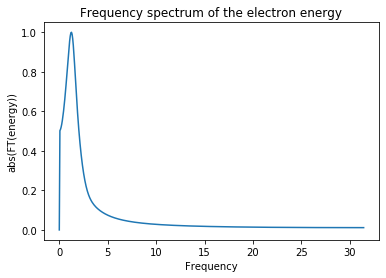

In [22]:
times = np.linspace(0,100,1000)
plot = electron_energy_FT_plot(times,2,0.5,4)

The spectrum is consistant with damped harmonic oscillations at a frequecy given by the coefficient of the restoring force. (The projectile velcocity is below the bragg peak, in the damped harmonic motion regime) 

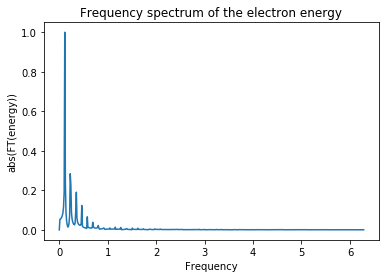

In [23]:
times = np.linspace(0,500,1000)
plot = electron_energy_FT_plot(times,0.1,1,4)

The spectrum for a projectile velocity at the bragg peak show a dominant peak that is close to the free oscillation frequency expected when there is no electronic stopping power, with higher order harmonics also contributing. 

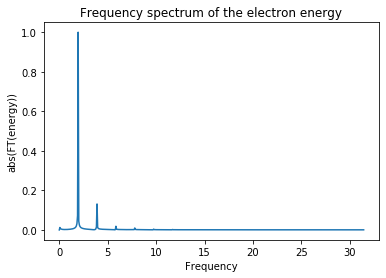

In [24]:
times = np.linspace(0,100,1000)
plot = electron_energy_FT_plot(times,4,1,4)

Close to the bragg peak, increasing the restoring force reduces contribution of higher harmonics to the spectrum (high frequency kink is removed).

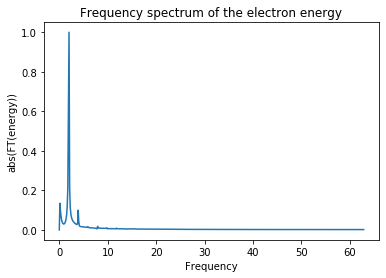

In [25]:
times = np.linspace(0,50,1000)
plot = electron_energy_FT_plot(times,4,1.2,4)

The spectrum for a projectile velocity above the bragg peak has a dominant contribution from the free oscillation frequency. 

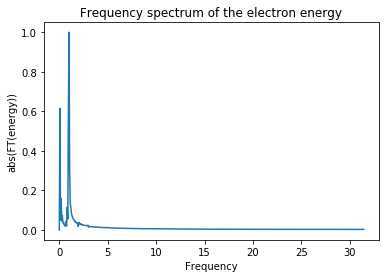

In [26]:
times = np.linspace(0,100,1000)
plot = electron_energy_FT_plot(times,1,3,4)

The peak has a dominant contribution from the free oscillation frequency, the contribution for lower frequencies is due to the solution taking a significant time to reach equilibrium. 

In [27]:
def electron_energy_equilibrium_FT_plot(times,lin_coeff,projectile_velocity,alpha):
    fig, ax = plt.subplots()
    sol = electron_solution(times,lin_coeff,projectile_velocity,alpha)
    positions = sol.get_positions()
    relative_positions = positions - projectile_velocity*times
    velocities = sol.get_velocities()

    energies = (1/2)*(velocities**2) + (1/2)*lin_coeff*(relative_positions**2)
    energies_eq = energies[int(np.size(times)/2):]
    energy_eq_ave = np.average(energies_eq)
    energy_ft = np.fft.rfft(energies_eq - energy_eq_ave)
    abs_energy_ft = abs(energy_ft)
    abs_energy_ft_norm = abs_energy_ft/np.amax(abs_energy_ft)
    frequencies = 2*np.pi/times[-1]*range(len(abs_energy_ft_norm))
    plt.plot(frequencies,abs_energy_ft_norm)
    plt.xlabel('Frequency')
    plt.ylabel('abs(FT(energy))')
    plt.title('Frequency spectrum of the electron energy at equilibrium')
    return fig 

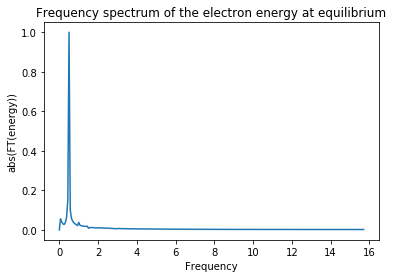

In [28]:
times = np.linspace(0,100,1000)
plot = electron_energy_equilibrium_FT_plot(times,1,3,4)

When calculating the spectrum for the energy once the solution has reached a steady state oscillation the low frequency peaks below the dominant peak are removed as expected. 

In [29]:
def energy_lost_by_electron(times,lin_coeff,projectile_velocity,alpha):
    sol = electron_solution(times,lin_coeff,projectile_velocity,alpha)
    positions = sol.get_positions()
    relative_positions = positions - projectile_velocity*times
    velocities = sol.get_velocities()
    force = sol.get_force_eqn()(positions,velocities,times) 

    instantaneous_power_dissipated = -force*velocities
    delta_t = times[1] - times[0]
    energy_lost = np.trapz(instantaneous_power_dissipated,dx = delta_t)
    return energy_lost

In [46]:
def stopping_power_for_electron_plot(times,lin_coeff,projectile_velocities,alpha):
    fig,ax = plt.subplots()
    stopping_powers = []
    for i in range(len(projectile_velocities)):
        projectile_velocity = projectile_velocities[i]
        energy_lost = energy_lost_by_electron(times,lin_coeff,projectile_velocity,alpha)
        stopping_power = energy_lost/projectile_velocity
        stopping_powers.append(stopping_power)

    normalised_sp = (1/100)*np.array(stopping_powers)
    plt.plot(projectile_velocities,stopping_powers)
    v_range = np.linspace(0,3,1000)
    plot = stopping_power_fit_plot(v_range,4)
    plt.xlabel('Projectile velocity')
    plt.ylabel('Energy lost be electron per unit length')
    plt.title('Stopping power calculated for the core electron of the projectile')

    return fig 

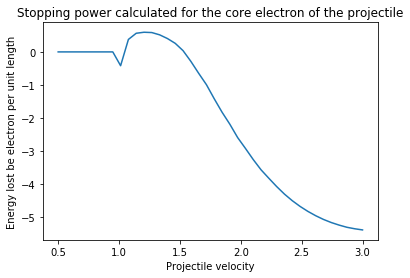

In [31]:
times = np.linspace(0,100,10000)
projectile_velocities = np.linspace(0.5,3,40)
plot1 = stopping_power_for_electron_plot(times,4,projectile_velocities,4)

In the damped harmonic oscillation regime (below bragg peak) the oscillations in the electron decay quickly meaning that for most of the simulation the force on the electron is 0 hence the energy lost by the electron is negligible. 
This plot has some of the features of the stopping power for the projectile but in the damped harmonic oscillator regime and at the bragg peak the for of the stopping power is different than that for the projectile. This might be due to the power dissipated by the electron being defined using the total force on the electron not just the dissipative part, meaning that if the electron doesn't complete a whole number of oscillation cycles then we would calculate an energy dissipation due to the restoring force, which is not a dissipative force. 

In [13]:
def energy_lost_by_electron(times,lin_coeff,projectile_velocity,alpha):
    sol = electron_solution(times,lin_coeff,projectile_velocity,alpha)
    positions = sol.get_positions()
    relative_positions = positions - projectile_velocity*times
    velocities = sol.get_velocities()
    force = sol.get_force_eqn()(positions,velocities,times) +lin_coeff*relative_positions

    instantaneous_power_dissipated = -force*velocities
    delta_t = times[1] - times[0]
    energy_lost = np.trapz(instantaneous_power_dissipated,dx = delta_t)
    return energy_lost

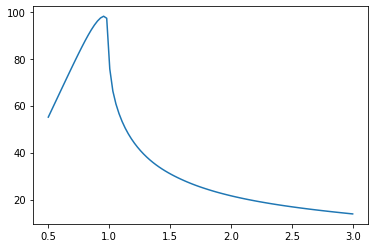

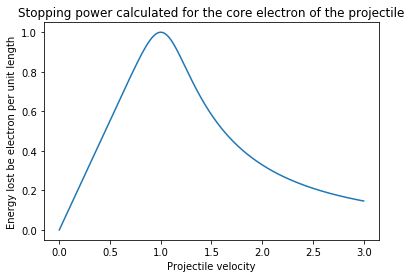

In [47]:
times = np.linspace(0,100,10000)
projectile_velocities = np.linspace(0.5,3,100)
plot1 = stopping_power_for_electron_plot(times,4,projectile_velocities,4)



Now as the power is defined using only the dissipative contribution to the force, the stopping power calculated for the electron has a much similar form to that for the projectile. 

In [17]:
def stopping_power_for_electron_lin_coeff_plot(times,lin_coeffs,projectile_velocities,alpha):
    fig,ax = plt.subplots()
    for j in range(len(lin_coeffs)):
        stopping_powers = []
        lin_coeff = lin_coeffs[j]
        for i in range(len(projectile_velocities)):
            projectile_velocity = projectile_velocities[i]
            energy_lost = energy_lost_by_electron(times,lin_coeff,projectile_velocity,alpha)
            stopping_power = energy_lost/projectile_velocity
            stopping_powers.append(stopping_power)
        plt.plot(projectile_velocities,stopping_powers,label = 'lin coeff = {}'.format(lin_coeff))
    plt.xlabel('Projectile velocity')
    plt.ylabel('Energy lost be electron per unit length')
    plt.legend()
    plt.title('Stopping power calculated for the core electron of the projectile')

    return fig 

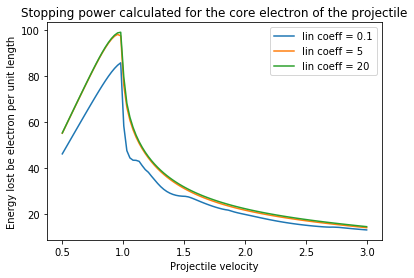

In [18]:
times = np.linspace(0,100,10000)
projectile_velocities = np.linspace(0.5,3,100)
plot1 = stopping_power_for_electron_lin_coeff_plot(times,[0.1,5,20],projectile_velocities,4)

As the restoring force is decreased, the stopping power for the core electron decreases and in the antistokes regime (just beyond the bragg peak) the stopping power for a small restoring force has deviations from the expected form of the stopping power. 

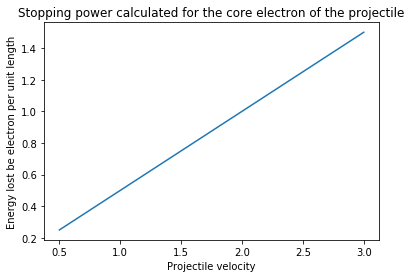

In [19]:
times = np.linspace(0,100,10000)
projectile_velocities = np.linspace(0.5,3,100)
plot1 = stopping_power_for_electron_plot(times,0,projectile_velocities,4)

When there is no restoring force acting on the electron the electron is completely stopped by the force due to the electronic stopping power, meaning that the energy lost is equal to it's initial kinetic energy meaning that the stopping power is proportional to the initial velocity of the electron. 

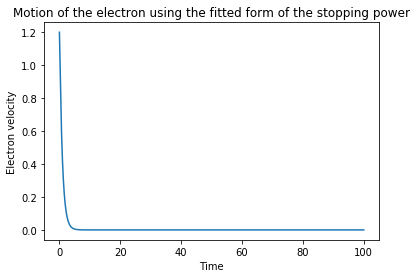

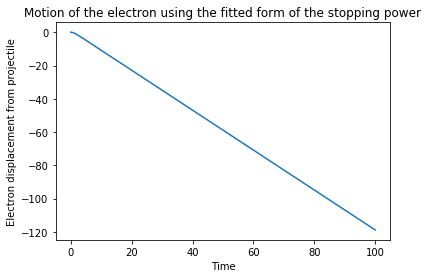

In [23]:
times = np.linspace(0,100,1000)
plot1 = electron_velocity_plot(times,0,1.2,4)
plot2 = electron_position_plot(times,0,1.2,4)

The displacemet from the projectile grows without bound even though the electron is completely stopped becuase in this model the projectile loses negligible kinetic energy hence continues to move at constant velocity after the core electron is completely stopped. 

It is clear that in order to have a core electron that has stable motion about the projectile (not removed from the projectile) we must have a restoring force of some type. One possible origin of this restoring force is the repulsion between the other core electrons in the projectile and the core electron of interest. 

Consider an atom defined to have radius $R$ that has a uniform charge density $-\rho$ due to the core electrons. The electrostatic potential due to the uniform negative charge satisfies poisson's equation:
$$ {\nabla}^{2}V(r) = \frac{\rho}{{\epsilon}_{0}}$$
where the origin is defined to be the nucleus of the atom. 

The solution for $r<R$ takes the form:
$$V(r) = -\frac{\rho{r}^2}{6\epsilon_{0}}$$
meaning that a core electron at a distance $r<R$ from the nucleus has potential energy due to the other core electrons:
$$U(r) = \frac{e\rho{r}^2}{6\epsilon_{0}}$$
This is of the form of a harmonic potential used in our model, with the 'spring constant' $\alpha$ given by:
$$\alpha = \frac{e\rho}{3\epsilon_{0}} = \frac{(Z-1)e^{2}}{4\pi{R}^{3}\epsilon_{0}}$$ 
where Z is the atomic number of the atom. 

E.g. For a Ni atom of radius $R = 53pm$ and atomic number $Z = 28$, the 'spring constant':
$$\alpha \approx 2.6 keV {Angstrom}^{-2}$$

If we take the typical displacement of the core electron from the nucleus to be of $O(10pm)$ then the typical restoring force on the electron, $F_{restoring} \sim O(0.1 keV {Angstrom}^{-1})$ which is 1 order of magnitude smaller than the typical force due to the electronic stopping power of the target. 

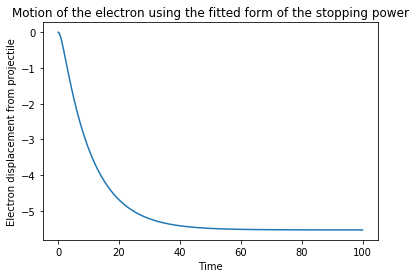

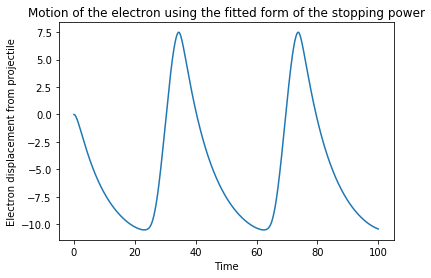

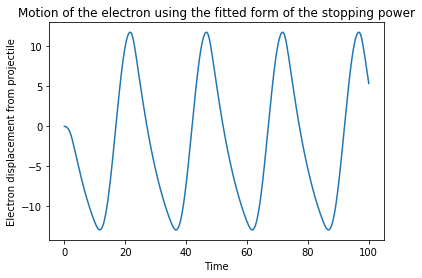

In [35]:
times = np.linspace(0,100,10000)
plot1 = electron_position_plot(times,0.1,0.5,4)
plot2 = electron_position_plot(times,0.1,1.1,4)
plot3 = electron_position_plot(times,0.1,2,4)

Using the relative sizes of the restoring and stopping power force on the core electron determined from the calculation above we observe stable oscillations just above and far above the bragg peak, but in the damped harmonic oscillation regime the oscillations decay as expected. 

Now that the relative scales of the 2 forces in our problem are fixed, all we need to determine now is the scaling between the force acting on the core electron and it's acceleration. 

In [36]:
def electron_solution_scaled(times,lin_coeff,projectile_velocity,alpha,scaling_factor):
    def force(x,v,t):
        return scaling_factor*electron_force_eqn(x,v,t,lin_coeff,projectile_velocity,alpha)
    initial = [0,projectile_velocity]
    sol = ODE_solver_time_dependent(initial,force,times)
    return sol

In [37]:
def electron_velocity_plot_scaled(times,lin_coeff,projectile_velocity,alpha,scaling_factor):
    fig,ax = plt.subplots()
    sol = electron_solution_scaled(times,lin_coeff,projectile_velocity,alpha,scaling_factor)
    velocities = sol.get_velocities()
    plt.plot(times,velocities)
    plt.xlabel('Time')
    plt.ylabel('Electron velocity')
    plt.title('Motion of the electron using the fitted form of the stopping power')
    return fig

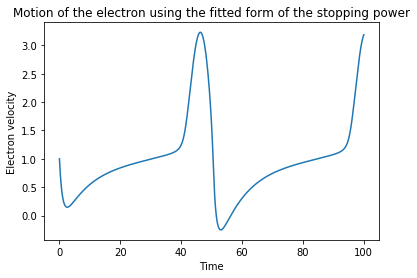

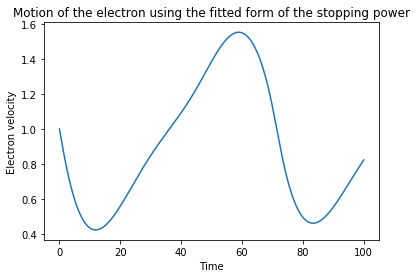

In [49]:
times = np.linspace(0,100,10000)
plot1 = electron_velocity_plot_scaled(times,0.1,1,4,1)
plot2 = electron_velocity_plot_scaled(times,0.1,1,4,0.01)

We can see that by changing the scaling between the force and acceleration changes the fluctuations in veocity relative to the projectile velocity and the timescale of these fluctuations. 